In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('estimates.csv')
df.head(10)


,name,technical,nontechnical,total,year
0,80000 hours,NaN,NaN,300.0,2022
1,EAF post,100-200,NaN,NaN,2022
2,LW post,150,NaN,NaN,2022
3,Twitter thread,100,NaN,NaN,2022
4,Vox article,50,NaN,NaN,2022
5,State of AI presentation,94,NaN,NaN,2022
6,my estimate,247,93.0,340.0,2022
7,Effective Altruism,NaN,NaN,450.0,2021


technical_estimates: [('Vox article', 50), ('State of AI presentation', 94), ('Twitter thread', 100), ('LW post', 150), ('my estimate', 247)]
average estimate: 128.2
median estimate: 100.0


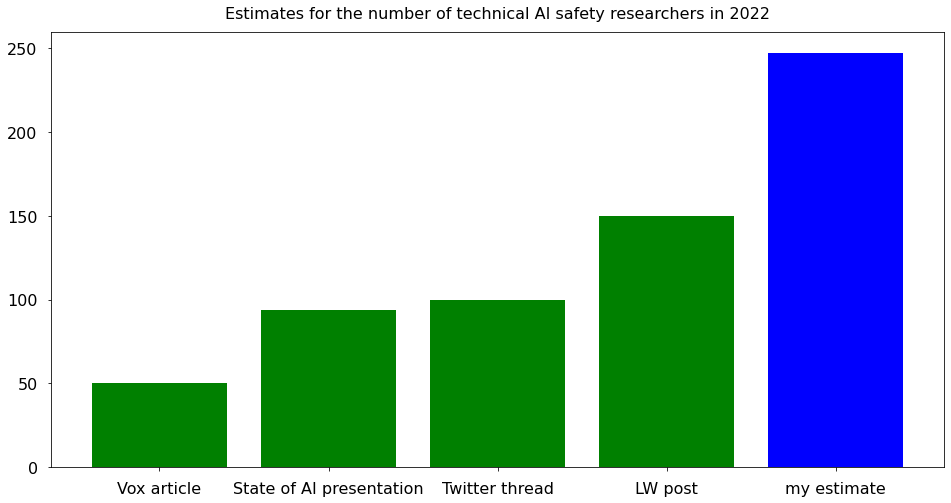

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))

# Number of technical researchers:
technical_estimates = []

for i, row in df.iterrows():
    name, n = row['name'], row['technical']
    try:
        technical_estimates.append((name, int(n)))
    except Exception:
        pass

technical_estimates = sorted(technical_estimates, key=lambda x: x[1])

print(f'technical_estimates: {technical_estimates}')

x = [t[0] for t in technical_estimates]
height = [int(t[1]) for t in technical_estimates]

ax.set_title('Estimates for the number of technical AI safety researchers in 2022', fontsize=16, pad=14)
ax.tick_params(axis='both', labelsize=16, pad=10)
# ax.errorbar(x, height, [20] * len(x), fmt='o', linewidth=2, capsize=6)

bar_colors = ['green' if t[0] != 'my estimate' else 'blue' for t in technical_estimates]
ax.bar(x, height, color=bar_colors)

print(f'average estimate: {np.mean(height)}')
print(f'median estimate: {np.median(height)}')


[('80000 hours', 300), ('my estimate', 340), ('Effective Altruism', 450)]


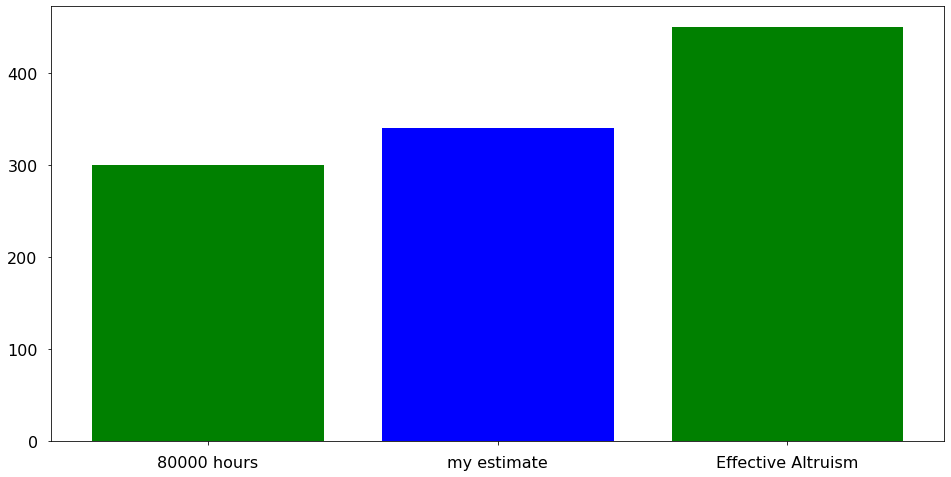

In [14]:
# Total number of researchers:
total_estimates = []

for i, row in df.iterrows():
    name, n = row['name'], row['total']
    try:
        total_estimates.append((name, int(n)))
    except Exception:
        pass

total_estimates = sorted(total_estimates, key=lambda x: x[1])
print(total_estimates)

x2 = [t[0] for t in total_estimates]
height2 = [int(t[1]) for t in total_estimates]

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(x2, height2, color=['green', 'blue', 'green'])
ax.tick_params(axis='both', labelsize=16, pad=10)

<BarContainer object of 3 artists>

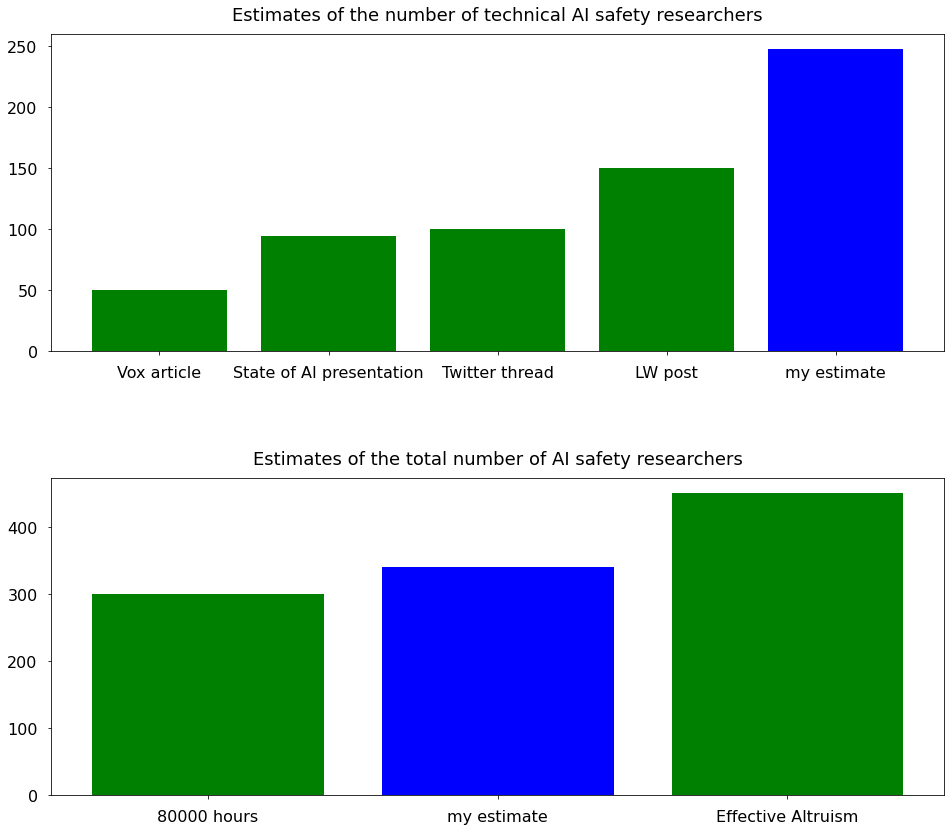

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(16, 14))
plt.subplots_adjust(hspace=0.4)
for axis in ax:
    axis.tick_params(axis='both', labelsize=16, pad=10)

ax[0].set_title('Estimates of the number of technical AI safety researchers', fontsize=18, pad=14)
ax[0].bar(x, height, color=['green', 'green', 'green', 'green', 'blue'])

ax[1].set_title('Estimates of the total number of AI safety researchers', fontsize=18, pad=14)
ax[1].bar(x2, height2, color=['green', 'blue','green'])